In [1]:
import pandas as pd
import numpy as np
import os
import streamlit as st
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.express as px
from sklearn.decomposition import PCA

# Plotting libraries
import matplotlib.pyplot as plt


# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

# Data file path
FILE_PATH = 'iris_species.csv'

# Dataframe from csv file
iris_data = pd.read_csv(FILE_PATH, header=0)

iris_data.info()
print("=="*40)
iris_data.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [2]:
X = iris_data.loc[:, iris_data.columns != 'variety']
y = iris_data.loc[:, ['variety']]

y_enc = LabelEncoder().fit_transform(y)
# Converting the label into a matrix form
y_label = tf.keras.utils.to_categorical(y_enc)

c:\Users\DEEP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y_label, test_size=0.15)

# Validation set
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [4]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")
print(X_train.shape[1:])

Train shape : (105, 4), Y Train : (105, 3)
(4,)


In [5]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(500, activation='relu',),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ])
    
    return model

In [6]:
model = get_model()
# Compile the model
model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              5000      
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 903       
                                                                 
Total params: 656703 (2.51 MB)
Trainable params: 656703 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30


4/4 [==============================] - 1s 82ms/step - loss: 1.0377 - accuracy: 0.4000 - val_loss: 0.9619 - val_accuracy: 0.5778
Epoch 2/30
4/4 [==============================] - 0s 19ms/step - loss: 0.7324 - accuracy: 0.6952 - val_loss: 0.6325 - val_accuracy: 0.5778
Epoch 3/30
4/4 [==============================] - 0s 19ms/step - loss: 0.5067 - accuracy: 0.7238 - val_loss: 0.4447 - val_accuracy: 0.9778
Epoch 4/30
4/4 [==============================] - 0s 18ms/step - loss: 0.4088 - accuracy: 0.8571 - val_loss: 0.3459 - val_accuracy: 0.9556
Epoch 5/30
4/4 [==============================] - 0s 18ms/step - loss: 0.3028 - accuracy: 0.9333 - val_loss: 0.2794 - val_accuracy: 0.9556
Epoch 6/30
4/4 [==============================] - 0s 18ms/step - loss: 0.2379 - accuracy: 0.9333 - val_loss: 0.2030 - val_accuracy: 0.9778
Epoch 7/30
4/4 [==============================] - 0s 18ms/step - loss: 0.2285 - accuracy: 0.9143 - val_loss: 0.2685 - val_accuracy: 0.9111
Epoch 8/30
4/4 [=========

In [8]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0904 - accuracy: 0.9778


[0.09042835235595703, 0.9777777791023254]

Performance Monitor

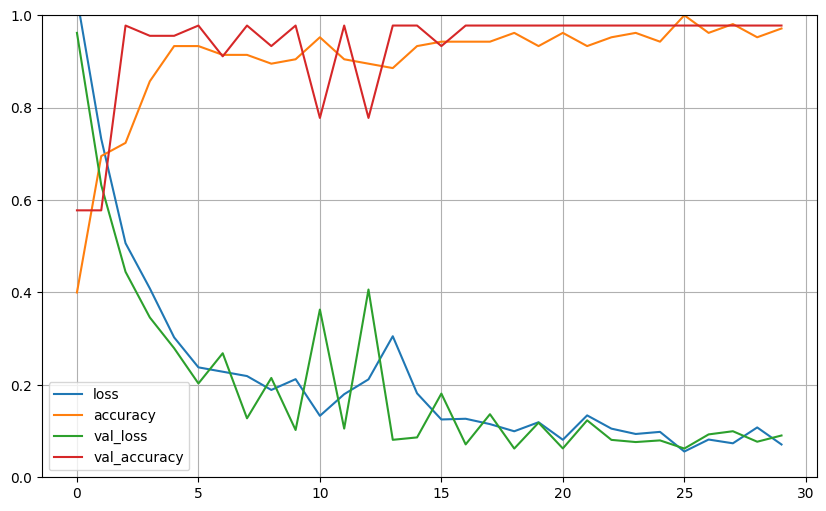

In [9]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [10]:
new_data, y_actual = X_test[:3], y_test[:3]

y_proba = model.predict(new_data)

print(f"Actual data : {y_actual}")

for pred in y_proba:
    print(np.argmax(pred))

1/1 [==============================] - 0s 82ms/step
Actual data : [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
0
1
2


In [11]:
# scaler will be used to scale user input.
def get_scaler():
    # Clean data
    X = iris_data.iloc[:, :4]
    y = np.zeros(shape=(X.shape[0], 3))

    for i, val in enumerate(iris_data['variety']):
        if val=='Virginica':
            y[i,:] = np.array([1, 0, 0])
        elif val=='Versicolor':
            y[i,:] = np.array([0, 1, 0])
        elif val=='Setosa':
            y[i,:] = np.array([0, 0, 1])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=100)

    # Scale data
    scaler = StandardScaler()
    scaler.fit(X_train)
    return scaler

scaler = get_scaler()

In [12]:
model.save("iris_model.keras")

In [13]:
# Load model
model = keras.models.load_model("iris_model.keras")

In [14]:
# App title and description
st.title('Iris Flower Classifier')
st.markdown("""Predict the species of an Iris flower using sepal and petal measurements.""")

2024-02-09 23:13:20.897 
  command:

    streamlit run C:\Users\DEEP\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [15]:
# Define components for the sidebar
st.sidebar.header('Input Features')
sepal_length = st.sidebar.slider(
    label='Sepal Length',
    min_value=iris_data['sepal.length'].min(),
    max_value=iris_data['sepal.length'].max(),
    value=round(iris_data['sepal.length'].mean(), 1),
    step=0.1)
sepal_width = st.sidebar.slider(
    label='Sepal Width',
    min_value=iris_data['sepal.width'].min(),
    max_value=iris_data['sepal.width'].max(),
    value=round(iris_data['sepal.width'].mean(), 1),
    step=0.1)
petal_length = st.sidebar.slider(
    label='Petal Length',
    min_value=iris_data['petal.length'].min(),
    max_value=iris_data['petal.length'].max(),
    value=round(iris_data['petal.length'].mean(), 1),
    step=0.1)
petal_width = st.sidebar.slider(
    label='Petal Width',
    min_value=iris_data['petal.width'].min(),
    max_value=iris_data['petal.width'].max(),
    value=round(iris_data['petal.width'].mean(), 1),
    step=0.1)

In [16]:
# Scale the user inputs
X_scaled = scaler.transform([[sepal_length, sepal_width, petal_length, petal_width]])

# Run input through the model
y_pred = model.predict(X_scaled)
df_pred = pd.DataFrame({
    'Species': ['Virginica', 'Versicolor', 'Setosa'], 'Confidence': y_pred.flatten()
})

1/1 [==============================] - 0s 67ms/step


c:\Users\DEEP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
# Define the prediction bar chart.
fig = px.bar(
    df_pred, 
    x='Species', 
    y='Confidence',
    width=350, 
    height=350, 
    color='Species',
    color_discrete_sequence =['#00CC96', '#EF553B', '#636EFA'])

# Create two columns for the web app.
# Column 1 will be for the predictions.
# Column 2 will be for the PCA.
# Make the second column 20% wider than the first column

col1, col2 = st.columns((1, 1.2))
with col1:
    st.markdown('### Predictions')
    fig

c:\Users\DEEP\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [18]:
def run_pca():
    # Run PCA
    pca = PCA(2)
    X = iris_data.iloc[:, :4]
    X_pca = pca.fit(X).transform(X)
    df_pca = pd.DataFrame(pca.transform(X))
    df_pca.columns = ['PC1', 'PC2']
    df_pca = pd.concat([df_pca, iris_data['variety']], axis=1)
    
    return pca, df_pca

pca, df_pca = run_pca()
# Create the PCA chart
pca_fig = px.scatter(
    df_pca, 
    x='PC1', 
    y='PC2', 
    color='variety', 
    hover_name='variety', 
    width=500, 
    height=350)


c:\Users\DEEP\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [19]:
# Retrieve user input
datapoint = np.array([[
            sepal_length,
            sepal_width,
            petal_length,
            petal_width
        ]])
# Map the 4-D user input to 2-D using the PCA
datapoint_pca = pca.transform(datapoint)
# Add the user input to the PCA chart
pca_fig.add_trace(go.Scatter(
        x=[datapoint_pca[0, 0]], 
        y=[datapoint_pca[0,1]], 
        mode='markers', 
        marker={'color': 'black', 'size':10}, name='Your Datapoint'))

with col2:
    st.markdown('### Principle Component Analysis')
    pca_fig

c:\Users\DEEP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

